# GECAMTools 使用说明

1. 所需环境  
    1.1 系统环境：windows、linux、mac  
    1.2 python环境：python版本>=3.6 (不建议安装python 3.9及以上版本)

2. 安装流程  
    2.1 下载源程序  
    gecamTools-master.zip  

    2.2 安装  
        2.2.1 仅使用基本功能(即无需生成响应矩阵)
        使用pip进行源码安装，自动安装GECAMTools以及相关依赖库   
        `pip install gecamTools-master.zip`

         建议使用Anaconda创建独立的python环境使用，防止出现不同软件的依赖库版本不兼容问题。 [Miniconda使用说明](https://www.jianshu.com/p/7299c2d4d170)   

        2.2.2 使用全部功能(包含生成响应矩阵)   
            CALDB 下载    
            (1) 下载CALDB, 参考已公布的链接 
     [GECAM CADB](http://gecamweb.ihep.ac.cn/xgwd.jhtml)   
            (2) 从GECAM集群上下载最新版的CALDB.(截止2022-03-18，最新版本CALDB的路径为：/gecamfs/soft/CALDB)   

            CALDB 安装：Linux或Mac     
            (1) 标定库CALDB下载之后, 将source /CALDB path/software/tools/caldbinit.sh 这句话放环境文件里   
            (2) source 环境文件，可进入 python，并通过 `from RSP_Generator import gen_rsp_fits` 来检验标定库是否安装成功

            CALDB 安装: Windows (测试于win10):   
            (1) 添加系统变量： 变量名为：CALDB， 地址为CALDB对应的根目录，例：E:\gecam\CALDB   
            (2) 在python环境的site-packages中新建一个CALDB.pth文件
                可通过以下方法找到python或者conda对应的目录：
                >>> import os
                >>> os.path.dirname(os.__file__)
                >>> 'C:\\Users\\用户名\\.conda\\envs\\gecamTools\\lib'
                因此新建文件：C:\Users\用户名\\.conda\envs\gecamTools\Lib\site-packages\CALDB.pth
                CALDB.pth中内容为CALDB中software文件夹路径：E:\gecam\CALDB\software
            (3) 完成之后，可进入 python，通过 `import RSP_generator` 来检验标定库是否安装成功

    2.3 测试  
    `import gecam`

3. 卸载流程  
    `pip uninstall GECAMTools`



## 获取示例所用的测试数据


测试数据的下载链接 

1. 事例文件（gbg_evt_tn210511_112749_fb_v00.fits）： [download link](https://ihepbox.ihep.ac.cn/ihepbox/index.php/s/iEE9AZQyNuJljr0)   

2. 姿态轨道文件（gb_posatt_tn210511_112749_v00.fits）： [download link](https://ihepbox.ihep.ac.cn/ihepbox/index.php/s/jgCjdaZHqlTgpju)

## 版本更新说明

--v20230420 (当前版本)<br>
<font color="#ff8a14">修复问题：</font><br>
1. 修复evt中生成多探头光变的误差计算错误<br>
2. 修正并道数据设置channel bin失效的问题<br>
3. 能谱图中总谱、本底谱和净谱统一为修正死时间后的能谱，统一能谱为counts/s<br>
4. T90计算异常的问题<br>
5. GECAMC的入射角计算错误。

<font color="#12CF6A">新增：</font><br>
1. 新增各类型文件的统一函数用于(GECAM的事例数据、GECAM的并道数据)：多探头的画光变、画能谱、生成能谱文件、计算T90<br>
    新增函数：<br>
    evt.plot_light_curve_with_detectors<br>
    evt.plot_spectrum_with_detectors<br>
    evt.generate_spec_file_with_detecotrs<br>
    duration_obj.generate_net_light_curve_with_detectors<br><br>
    同时，原始函数将停止更新，过几个版本后删除<br>
    原始函数如下所示：<br>
    evt.plot_light_curve<br>
    evt.plot_spectrum<br>
    evt.generate_spec_file<br>
    duration_obj.generate_net_light_curve_with_detectors<br>
    cal_net_light_curve_cumsum<br>

2. 新增自定义光变用于计算T90，不限于GECAM的数据（见本文末尾）

## 功能列表

1. 基础功能  
    1.1 时间转换 

2. 多探头批量分析  
    2.1 显示光变  
    2.2 显示能谱  
    2.3 生成响应文件（依赖于GECAM CALDB）  
    2.4 生成能谱文件  

3. 单个探头的细致分析  
    3.1 显示光变（查看并修正单个能段的本底拟合结果）  
    3.2 显示能谱  
    3.3 生成响应文件（依赖于GECAM CALDB）  
    3.4 生成能谱文件 
    
4. 爆发现象分析  
    4.1 爆发持续时间估计 （T90, T50）,可使用自定义数据

# 1. 基础功能

## 1.1 时间转换

In [9]:
from gecam.time import GecamMet

In [10]:
trig_met=74431600.6

In [11]:
# met转时间字符串
trig_time_str=GecamMet(trig_met).iso
# met转datetime
trig_datetime=GecamMet(trig_met).datetime
# met转MJD
trig_mjd=GecamMet(trig_met).mjd

trig_time_str,trig_datetime,trig_mjd

('2021-05-11T11:26:40.600000',
 datetime.datetime(2021, 5, 11, 11, 26, 40, 600000, tzinfo=datetime.timezone.utc),
 59345.4768587963)

In [12]:
# 时间字符串转met
met1=GecamMet.from_iso(trig_time_str)
# datetime转met
met2=GecamMet.from_datetime(trig_datetime)
# MJD转met
met3=GecamMet.from_mjd(trig_mjd)

met1,met2,met3

(<GecamMet seconds = 74431600.600000>,
 <GecamMet seconds = 74431600.600000>,
 <GecamMet seconds = 74431600.600000>)

# 2. 多个探头批量分析

## 读取GECAM的事例数据

In [13]:
from gecam.data.evt import Evt

evt_path=r"gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)

## 读取GECAM的并道数据

In [16]:
from gecam.data.binned import BinnedFile

file_path = r"gbg_bspec_bn221015_021354_v00.fits"
# 读取GECAM的并道数据文件，可适用于能谱并道文件和时间并道文件
binned = BinnedFile.open(file_path)

# GECAM的并道数据和事例数据在使用上较为相似
# 比较明显的区别在于，
# 并道数据在通过slice过滤数据时没有选取推荐事例的选项（only_recommend）,
# 使用并道数据时，需将这个参数去掉。

# 因此，如需使用并道数据分析，可将evt替换为binnned.
# 示例：画多个探头的光变曲线
# evt.plot_light_curve_with_detectors
# 替换为
# binned.plot_light_curve_with_detectors

#### <font color="#ff8a14">GECAM的并道数据和事例数据在使用上较为相似<br>后续将只使用事例数据作为示例</font>

## 2.1 读取事例数据（1级daily或trigger事例数据）

In [17]:
from gecam.data.evt import Evt
from gecam.data.spec import SpecFile
from gecam.data.detector import GRD, CPD
from gecam.plot.light_curve import LightCurveFigure
from gecam.plot.spectrum import SpectrumFigure

import matplotlib.pyplot as plt

In [18]:
# 事例文件路径
# /gecamfs/Archived-DATA/GSDC/LEVEL1/triggers/2021/05/tn210511_112749_fb/gbg_evt_tn210511_112749_fb_v00.fits

from gecam.data.evt import Evt

evt_path=r"gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)

In [19]:
from gecam.time import GecamMet

evt_info=evt.info
print("satellite:",evt_info.satellite)
print("instrument:",evt_info.instrument)
print("trigger id:",evt_info.trig_id)
print("trigger met:",evt_info.trig_met, GecamMet(evt_info.trig_met).iso)
print("observe met range:",evt_info.obs_met_range)
print("location (ra, dec, error):",evt_info.loc)

# 查看ebounds
# print(evt_info.ebounds)
# 查看完整的primary header
# print(evt_info.primary_header)

satellite: b
instrument: GRD
trigger id: tn210511_112749_fb
trigger met: 74431600.6 2021-05-11T11:26:40.600000
observe met range: (74431501.0, 74431899.0)
location (ra, dec, error): (317.99, 59.53, 3.19)


### 2.1.1 批量选取探头

In [20]:
# 示例：选取10个高增益，15个低增益
choose_det=[]

choose_det.extend([GRD(number=i, gain_type="high") for i in range(1,11)])

choose_det.extend([GRD(i,"low") for i in range(11,26)])

# [det.full_name for det in choose_det]

## 2.2 查看多个探头的叠加光变

bg18H
bg18L
bg19H


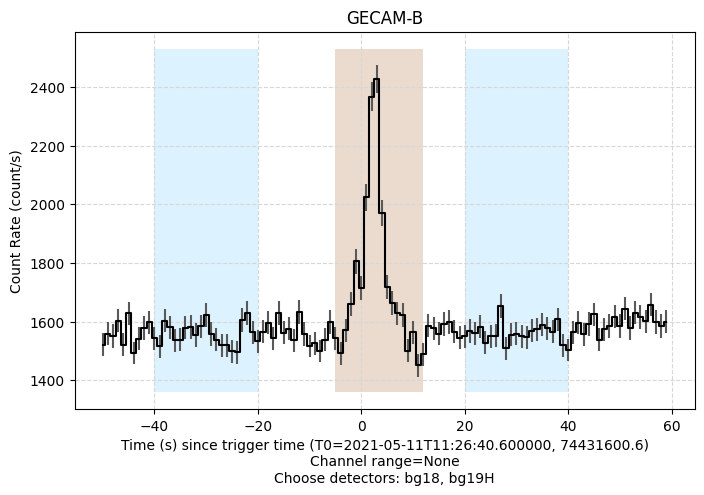

In [22]:
trig_met = evt.info.trig_met

chooose_det = [GRD(18,gain_type="both"), GRD(19,gain_type="high")]
slice_kwargs_dic = {
    "time_range": [trig_met - 50, trig_met + 60],
    "only_recommend": True
}

lc_kwargs_dic = {
    "time_bin": 1,
    "channel_bin": 1,
    "correct_by_dead_time": True,
}
fig_kwargs_dic = {
    "bg_range": [[trig_met - 40, trig_met - 20], [trig_met + 20, trig_met + 40]],
    "src_range": [trig_met - 5, trig_met + 12]
}

# # 画多探头的叠加光变
total_lc_obj, dets_lc_list, lc_data, lc_fig = evt.plot_light_curve_with_detectors(chooose_det, slice_kwargs_dic,
                                                                                  lc_kwargs_dic, fig_kwargs_dic)

## 2.3 查看多个探头的叠加能谱

bg18H
bg18L
bg19H


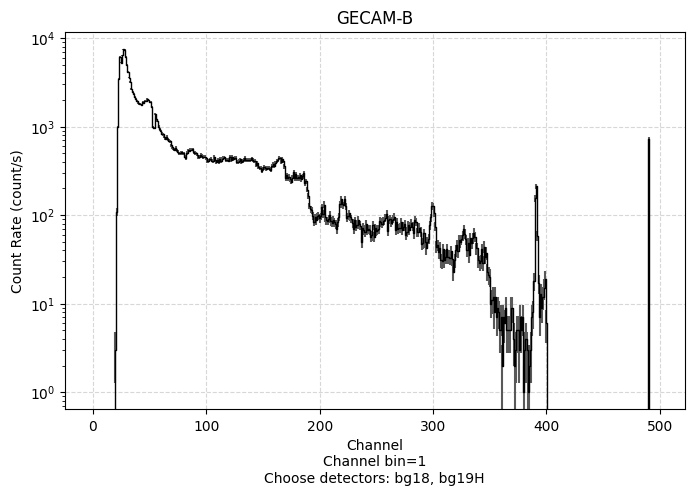

In [23]:
chooose_det = [GRD(18,gain_type="both"), GRD(19,gain_type="high")]
slice_kwargs_dic = {
    "time_range": [trig_met - 50, trig_met + 60],
    "only_recommend": True
}

spec_kwargs_dic = {
    "channel_bin": 1
}
fig_kwargs_dic = {}

# 画多探头的叠加的能谱
total_spec_obj, dets_spec_list, plot_spec_data, spec_fig = evt.plot_spectrum_with_detectors(chooose_det,
                                                                                            slice_kwargs_dic,
                                                                                            spec_kwargs_dic,
                                                                                            fig_kwargs_dic)
plt.yscale("log")
plt.show()

## 2.4 生成多个探头的响应文件

In [24]:
from gecam.data.posatt import PosAtt
from gecam.coord import radec_to_thetaphi
from gecam.utils import rsp_utils
from gecam.data.detector import GRD
# 读取posatt文件
posatt_path=r"gb_posatt_tn210511_112749_v00.fits"
posatt_obj = PosAtt.open(posatt_path)

# 选定met时间，或使用触发时间 evt.info.trig_met
choose_met = 74431600.6
# satallite: b/c
choose_satellite="c"

# 获取时间点对应的卫星姿态（四元数）
# TODO: 注意：
# For GECAMC(HEBS)， MET(59537900)前后的姿态四元数的格式错误，暂未修复
# pre_quat = ['Q2', 'Q3', 'Q4', 'Q1'] # until 59537900
# quat = ['Q1', 'Q2', 'Q3', 'Q4'] # from 59538144
quat = posatt_obj.get_quat(choose_met)

# 设定源坐标（J2000）
# 或取出触发evt文件的header中存储的源坐标: ra,dec,err_radius=evt.info.loc
ra = 317.99
dec = 59.53
# 根据源的坐标和卫星姿态计算入射角（deg）
theta, phi = radec_to_thetaphi(ra, dec, quat,satellite=choose_satellite)

# 选择探头(必须设定增益,high 或者 low)
choose_det = GRD(6, "high")
# 必须设置探头所属的卫星， a/b
choose_det.set_satellite(choose_satellite)


# 必须区分事例数据还是并道数据， 事例：evt  能谱并道: bspec 时间并道：btime
# evt/bspec/btime
event_type="evt"

# 设置响应文件输出的文件夹
out_dir = "./test_rsp/"

# 生成单个探头（单个响应）响应文件，返回响应文件的绝对路径
rsp_out_path = rsp_utils.generate_rsp_fits(choose_det.full_name, theta, phi, choose_met,event_type, out_dir)
rsp_out_path

'./test_rsp/gcg_06H_x_evt_v00.rsp'

In [25]:
# 生成多个探头的响应文件（必须区分高低增益）
import os

det_rsp_list = []

for det in [GRD(18), GRD(19)]:
    temp_rsp_list = []
    for gain_type in ["high", "low"]:
        det.set_gain_type(gain_type)
        det.set_satellite("b")
        
        event_type="evt"

        temp_rsp_path = rsp_utils.generate_rsp_fits(det.full_name, theta, phi, choose_met,event_type, out_dir)
        temp_rsp_list.append(os.path.basename(temp_rsp_path))
        print(temp_rsp_path)

    det_rsp_list.append(temp_rsp_list)

det_rsp_list

read index /gecam/CALDB_v1.2/data/gecam-b/grd/caldb.indx
./test_rsp/gbg_18H_x_evt_v00.rsp
./test_rsp/gbg_18L_x_evt_v00.rsp
./test_rsp/gbg_19H_x_evt_v00.rsp
./test_rsp/gbg_19L_x_evt_v00.rsp


[['gbg_18H_x_evt_v00.rsp', 'gbg_18L_x_evt_v00.rsp'],
 ['gbg_19H_x_evt_v00.rsp', 'gbg_19L_x_evt_v00.rsp']]

## 2.5 生成多个探头的能谱文件

In [27]:
chooose_det = [GRD(18,gain_type="both"), GRD(19,gain_type="high")]
lc_kwargs_dic = {
    "time_bin": 1,
    "channel_bin": [1, 1],  # [channel_bin_high_gain,channel_bin_low_gain]
    "correct_by_dead_time": True,
}
lc_bg_fit_kwargs_dic = {
    "bg_time_range": [[trig_met - 40, trig_met - 10], [trig_met + 25, trig_met + 60]],
    "fit_order": 1,
}
spec_file_kwargs_dic = {
    "src_range_list": [
        [trig_met - 5, trig_met - 1],
        [trig_met - 5, trig_met + 9],
        [trig_met - 5, trig_met + 4],
        [trig_met + 4, trig_met + 10]
    ],
    "rsp_list": [["det1_high_gain.rsp", "det1_low_gain.rsp"],
                 ["det2_high_gain.rsp", "det2_low_gain.rsp"]],
    "out_dir": "./test_spec_gecam_evt/"
}

spec_data = evt.generate_spec_file_with_detecotrs(chooose_det, slice_kwargs_dic, lc_kwargs_dic,
                                          lc_bg_fit_kwargs_dic, spec_file_kwargs_dic)

bg18H
bg18L


/root/miniconda3/envs/gecamTools/lib/python3.6/site-packages/gecam/fitting/polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 72, 73, 354, 361, 365, 366, 367, 368, 372, 373, 375, 376, 377, 378, 382, 385, 394, 396, 399

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


bg19H


In [28]:
spec_data.keys()

dict_keys(['bg18H', 'bg18L', 'bg19H'])

In [29]:
# 查看bg18H的能谱数据
spec_data_bg18H = spec_data.get("bg18H")
# 查看生成能谱前的总光变和本底光变
bg18H_lc=spec_data_bg18H.get("lc")
bg18H_bg_lc=spec_data_bg18H.get("bg_lc")

spec_list_bg18H=spec_data_bg18H.get("src_spec_list")

# 查看第一个时间段源的能谱数据
spec_list_bg18H_src1 = spec_list_bg18H[0]

src_range1, spec_bg18H, bg_spec_bg18H, net_spec_bg18H = spec_list_bg18H_src1

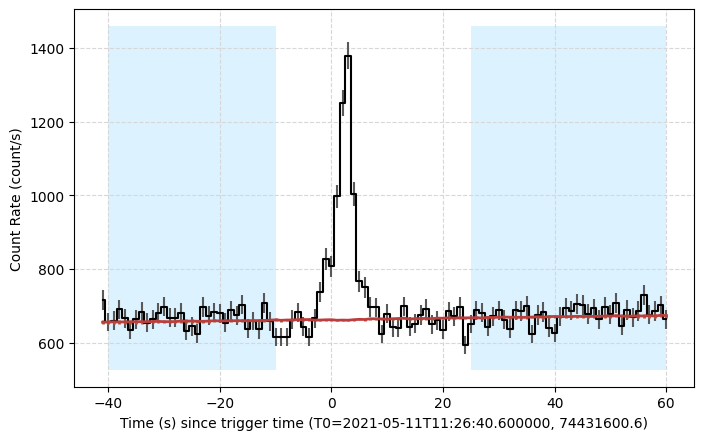

In [30]:
# 示例：检查bg18H在拟合光变时是否存在错误（参考后续的细致分析）
det_sliced_c_lc_fig = LightCurveFigure(bg18H_lc.get_plot_data(), trig_time=trig_met)
# 标记本底范围的阴影
det_sliced_c_lc_fig.add_background(bg18H_bg_lc.get_plot_data(),
                                   bg_time_range=bg18H_bg_lc.bg_time_range, label="bg")

# 查看bg18H的本底拟合评价
# channel_range=[10,200]
# bg18H_bg_lc.show_fitting_quality(channel_range=channel_range)
# plt.show()

In [22]:
# 能谱数据
# channel的每个bin的边界
channel_bins = spec_bg18H.channel_bins
# energy的每个bin的边界
energy_bins = spec_bg18H.energy_bins
# 每个channel bin的计数
counts = spec_bg18H.counts
# 每个channel bin的计数误差
count_err = spec_bg18H.counts_err

# 3 单个探头细致分析

## 3.1 读取事例文件

In [31]:
evt_path=r"gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)

## 3.2 过滤出单个探头的数据

In [32]:
# 过滤出探头18的数据
det_events = evt.select_detector(18)

## 3.3 对于单个探头的事例，进一步过滤

### 3.3.1 如果后续将使用该数据生成能谱文件，则必须过滤增益，不能选择全增益

In [33]:
# 对于探头数据进一步的数据过滤，增益、时间范围、能量范围、能道范围、是否只使用推荐事例

# 根据增益过滤，both:全增益， high:高增益， low：低增益
# gain_type=None,

# 根据时间过滤
#time_range=None,

# 过滤能量范围或能道范围，不同时进行，如果channel_range不为None,则只过滤channel
#energy_range=None,
#channel_range=None,

# 是否只选取推荐事例
#only_recommend=True
det_sliced_events = det_events.slice(gain_type="high", only_recommend=True)

## 3.4 从过滤后的数据中提取分能段的光变

In [34]:
# 提取触发时间
trig_met = evt.info.trig_met

# 光变的总时间范围（绝对时间）
lc_time_range = (trig_met - 50, trig_met + 70)

# 定义源时间段
src_time_range = [trig_met - 3, trig_met+9]
# 定义本底时间段
bg_time_range_list = [[trig_met - 40, trig_met - 20],
                      [trig_met + 25, trig_met + 60]]

# 时间bin，单位秒
time_bin = 2
# 能道分bin，整数为均匀分bin，一维列表为自定义分bin
channel_bin = 1

det_sliced_lc = det_sliced_events.to_light_curve(lc_time_range, time_bin, channel_bin)
# 本底拟合，拟合阶次为2
det_sliced_bg_lc = det_sliced_lc.fit_background(bg_time_range_list, fit_order=2)
# 提取源时间段的光变
det_src_lc = det_sliced_events.to_light_curve(src_time_range, time_bin, channel_bin)

/root/miniconda3/envs/gecamTools/lib/python3.6/site-packages/gecam/fitting/polynomial_fitter.py:266: RankWarning: The fit may be poorly conditioned
  self._coeffs[i] = self._weighted_leastsq(X, y[i], w[i], False)
/root/miniconda3/envs/gecamTools/lib/python3.6/site-packages/gecam/fitting/polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 170, 171

This error maybe eliminated by reducing the order of polynomial (the current is 2).
  RuntimeWarning


## 3.5 画出合并所有能段的光变

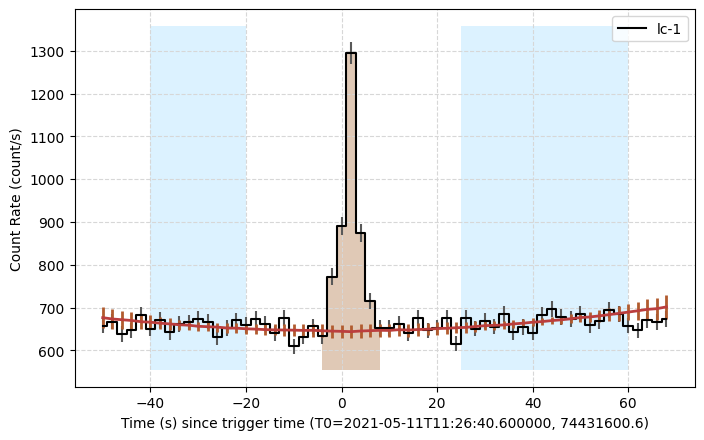

In [35]:
# 画出总时长光变（合并各个能段）
det_sliced_lc_fig = LightCurveFigure(det_sliced_lc.get_plot_data(), trig_time=trig_met, dpi=100)
# 画出本底
det_sliced_lc_fig.add_background(det_sliced_bg_lc.get_plot_data(),
                                 bg_time_range=det_sliced_bg_lc.bg_time_range)
# 画出源时间段的阴影
det_sliced_lc_fig.add_selection(det_src_lc.get_plot_data())
det_sliced_lc_fig.show_legend()


## 3.6 查看各个能段的拟合结果评价

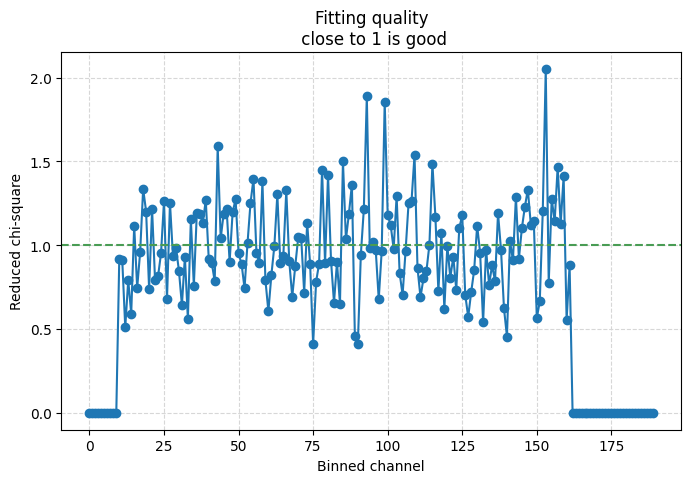

In [36]:
# 选择查看，并道后的第10至200道的拟合结果评价指标，None:为查看所有道
# 当前指标越接近1越好
channel_range=[10,200]
quality_data=det_sliced_bg_lc.show_fitting_quality(channel_range=channel_range)

# 对于某个能道拟合效果不好，
# 则后续程序，可查看该能段的光变，或重新单独拟合该能段的本底

## 3.7 画出能段序号为100的光变

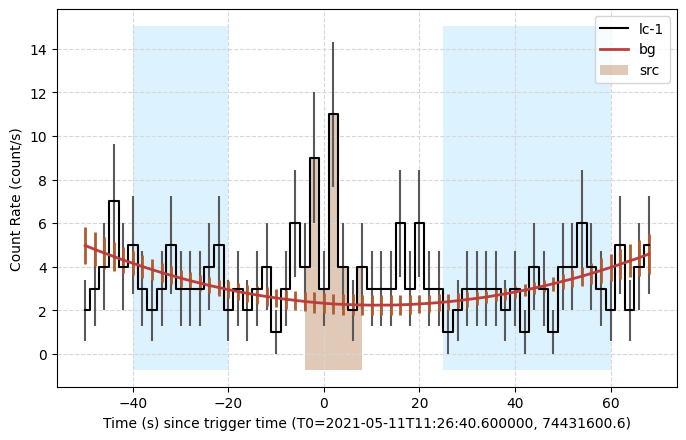

In [37]:
# 设置能段序号为100 （如果生成分能段光变时有进行并道，则选取并道后的能段序号）
choose_channel_index = 100

# 过滤选取能段的光变
channel_lc = det_sliced_lc.get_channel_lc(choose_channel_index) # 总长度光变
channel_src_lc = det_src_lc.get_channel_lc(choose_channel_index) # 源区间光变
channel_bg_lc = det_sliced_bg_lc.get_channel_lc(choose_channel_index) #本底区间光变

# 画光变
det_sliced_c_lc_fig = LightCurveFigure(channel_lc.get_plot_data(), trig_time=trig_met)
# 标记本底范围的阴影
det_sliced_c_lc_fig.add_background(channel_bg_lc.get_plot_data(),
                                   bg_time_range=channel_bg_lc.bg_time_range, label="bg")
#  标记源时间段
det_sliced_c_lc_fig.add_selection(channel_src_lc.get_plot_data(), label="src")
det_sliced_c_lc_fig.show_legend()
# plt.show()

## 3.8 调整单个能段的本底拟合

['2pass', 1, 15.960559371898515, 33.0, 0.483653314299955]


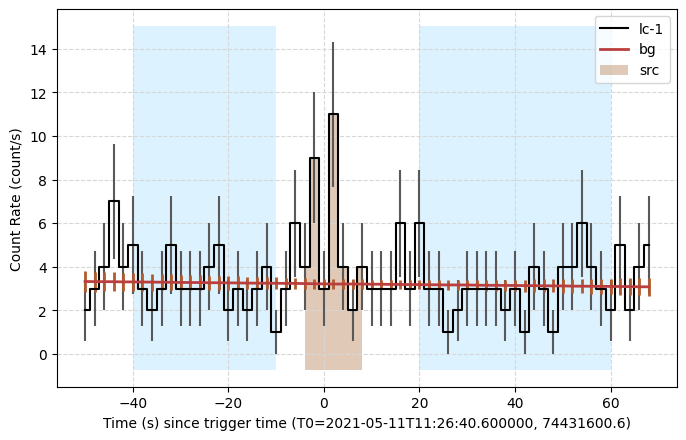

In [39]:
# 选择能段序号为100，（如果生成分能段光变时有进行并道，则选取并道后的能段序号）
choose_channel_index = 100

bg_time_range_list2 = [[trig_met - 40, trig_met - 10], [trig_met + 20, trig_met + 60]]
fit_order = 1

channel_lc = det_sliced_lc.get_channel_lc(choose_channel_index)
channel_bg_lc = channel_lc.fit_background(bg_time_range_list2, fit_order=fit_order)
print(channel_bg_lc.fit_info)

channel_src_lc = det_src_lc.get_channel_lc(choose_channel_index)

det_c_lc_fig = LightCurveFigure(channel_lc.get_plot_data(), trig_time=trig_met)
det_c_lc_fig.add_background(channel_bg_lc.get_plot_data(),
                            bg_time_range=channel_bg_lc.bg_time_range, label="bg")
det_c_lc_fig.add_selection(channel_src_lc.get_plot_data(), label="src")
det_c_lc_fig.show_legend()

## 3.9 生成当前探头的能谱

In [40]:
# 生成能谱文件的数据,时间分解谱
# det_sliced_lc： 单个探头的光变
# det_sliced_bg_lc： 单个探头的本底光变
from gecam.data.spec import SpecFile

spec_file = SpecFile(det_sliced_lc, det_sliced_bg_lc)


# 添加第一个源时间段
src_time_range=(trig_met -1, trig_met + 9)
spec, bg_spec, net_spec = spec_file.add_src(src_time_range)

# 添加第二个源时间段
src_time_range2 = (trig_met + 9, trig_met + 15)
spec2, bg_spec2, net_spec2 = spec_file.add_src(src_time_range2)

## 3.10 查看能谱

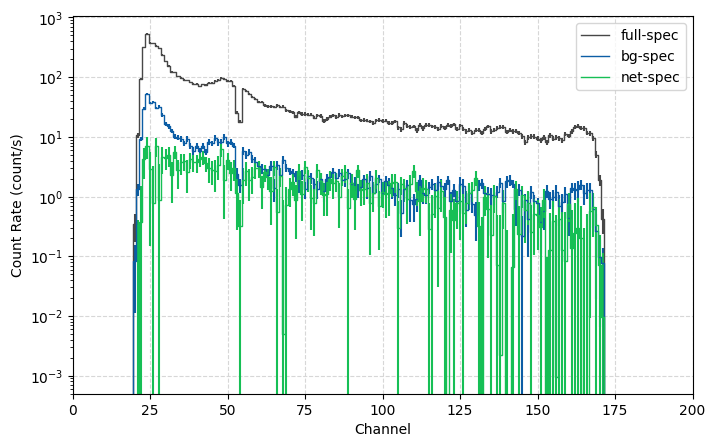

In [44]:
from gecam.plot.spectrum import SpectrumFigure

# 画出能谱文件的数据（当前选择第一段源时间段的能谱）
spec_fig = SpectrumFigure()
spec_fig.add_data(spec.get_plot_data(), color="#474747", err_color="#474747", label="full-spec", 
                  linewidth=1)
spec_fig.add_data(bg_spec.get_plot_data(), color="#0c5da5", err_color="#0c5da5", label="bg-spec",
                  linewidth=1)
spec_fig.add_data(net_spec.get_plot_data(), color="#16bf55", err_color="#16bf55", label="net-spec",
                  linewidth=1)

# 截断显示
spec_fig.set_xlim([0, 200])
# spec_fig.set_yscale("linear")
spec_fig.show_legend()


## 3.10 输出能谱到能谱文件中

In [45]:

# 能谱对应的响应文件
rsp_path = "test.rsp"
out_dir=r"./"
spec_file.write(out_dir, rsp_path=rsp_path)

/root/miniconda3/envs/gecamTools/lib/python3.6/site-packages/gecam/data/spec.py:182: UserWarning: Mask channel Quality of GECAM-A/B/C (greater than 448) to 1.
  warnings.warn("Mask channel Quality of GECAM-A/B/C (greater than 448) to 1.")


---

# 爆发现象分析

## 爆发时间估计 (T90, T50)

In [1]:
from gecam.data.evt import Evt
from gecam.analysis.burst_duration import BurstDuration
from gecam.data.detector import Detector, GRD

evt_path = r"gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)

### 生成净光变的累计计数曲线

In [2]:
trig_met=evt.info.trig_met
det_list = [GRD(18, gain_type="both"), GRD(17, gain_type="both"), 
            GRD(16, gain_type="both"), GRD(15, gain_type="both")]


slice_kwargs_dic = {
    "time_range": [trig_met - 20, trig_met + 20],
    "only_recommend": True
}
lc_kwargs_dic = {
    "time_bin": 0.01,
    "channel_bin": [0, 498]
}
lc_bg_fit_kwargs_dic = {
    "bg_time_range": [[trig_met - 20, trig_met - 5], [trig_met + 10, trig_met + 20]],
    "fit_order": 1
}
duration_obj = BurstDuration()
lc_dic, cumsum_net_lc_data=duration_obj.generate_net_light_curve_with_detectors(evt, det_list, slice_kwargs_dic,
                                                                                lc_kwargs_dic,lc_bg_fit_kwargs_dic)

bg18H
bg18L
bg17H
bg17L
bg16H
bg16L
bg15H
bg15L


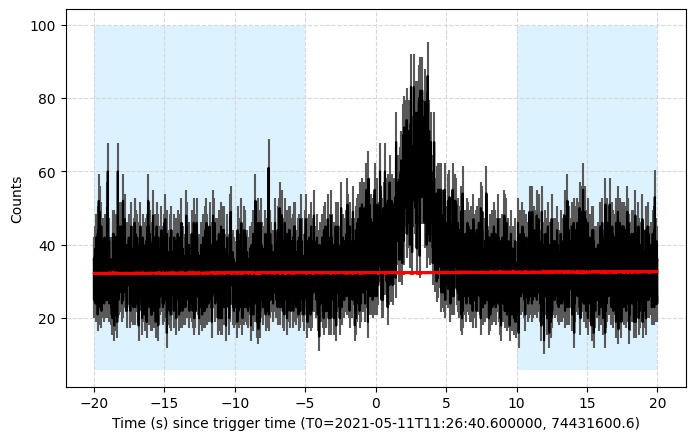

In [3]:
## 查看净光变

from gecam.plot.light_curve import LightCurveFigure
bg_lc_x, bg_lc_y, bg_lc_y_err = duration_obj.bg_lc_1D_data
total_lc_x, total_lc_y, total_lc_y_err = duration_obj.total_lc_1D_data
lc_bg_range = lc_bg_fit_kwargs_dic.get("bg_time_range")

lc_fig = LightCurveFigure((total_lc_x[:-1], total_lc_y, total_lc_y_err),
                          trig_time=duration_obj.evt_info.trig_met, dpi=100)
lc_fig.add_data((bg_lc_x[:-1], bg_lc_y, bg_lc_y_err), color="red",err_color="#FF5959")
lc_fig.add_background(bg_time_range=lc_bg_range)
lc_fig.set_ylabel("Counts")

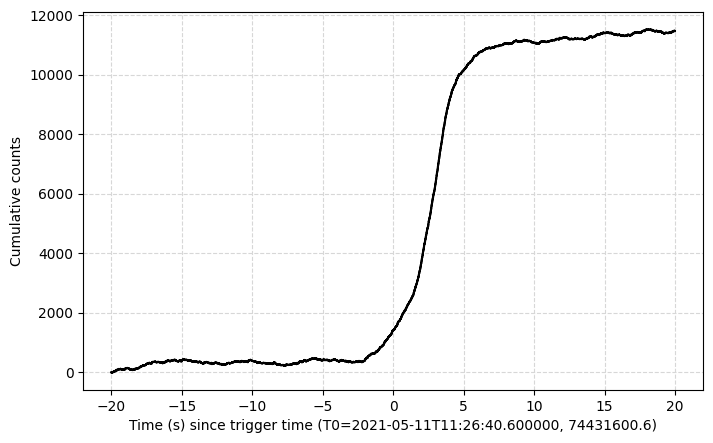

In [5]:

# 查看净光变的累计计数曲线，方便选取累计曲线的本底范围
set_time_range=None
cumsum_lc_fig = duration_obj.plot_light_curve_cumsum(set_time_range=set_time_range)

### 计算T90,T50

In [60]:
# 累计曲线的本底范围
cumsum_bg_range = [[trig_met - 15, trig_met - 5], [trig_met + 9, trig_met + 20]]

t90, t90_err,t50, t50_err=duration_obj.cal_burst_duration_by_cumsum_counts(cumsum_bg_range)

print("T90:",round(t90,4),"T90 error:",round(t90_err,4),"T90 start met:", duration_obj._T90_start)
print("T50:",round(t50,4),"T50 error:",round(t50_err,4),"T50 start met:", duration_obj._T50_start)

T90: 6.86 T90 error: 0.3 T90 start met: 74431599.79499957
T50: 1.99 T50 error: 0.13 T50 start met: 74431602.31500092


### 画出T90, T50的范围

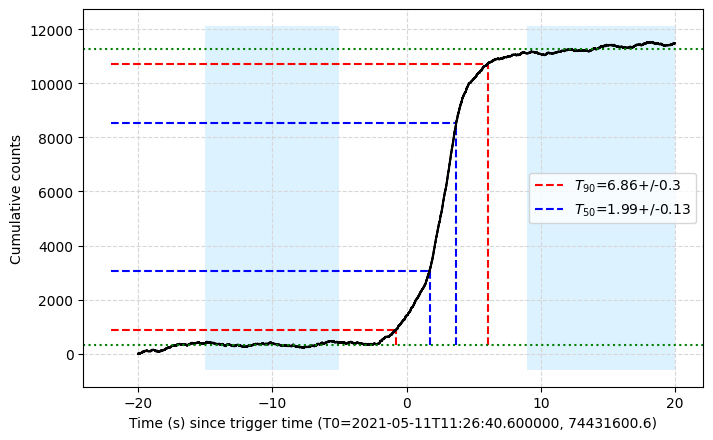

In [61]:
# set_time_range 用于限制图像的起始时间

# set_time_range = [trig_met - 10, trig_met + 10]
set_time_range=None
cumsum_lc_fig = duration_obj.plot_light_curve_cumsum(set_time_range=set_time_range)

### 自定义数据来估计T90, T50

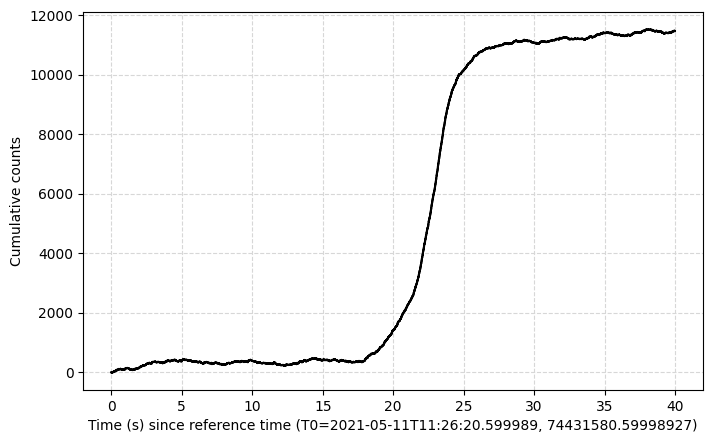

In [62]:

duration_obj3 = BurstDuration()

# 准备数据：总光变 total_lc 和净光变 net_lc (当前借用上节生成的光变作为示例)
# total_lc_data (list): total light curve (time bins, counts(one dimension), counts error)
# net_lc_data (list): net light curve (time bins, counts(one dimension), counts error)
total_lc_data, net_lc_data = duration_obj.total_lc_1D_data, duration_obj.net_lc_1D_data

duration_obj3.update_custom_data(total_lc_data, net_lc_data)

cumsum_lc_fig3 = duration_obj3.plot_light_curve_cumsum(set_time_range=set_time_range)


In [64]:
cumsum_bg_range =  [[trig_met - 15, trig_met - 5], [trig_met + 9, trig_met + 20]]
t90, t90_err, t50, t50_err = duration_obj3.cal_burst_duration_by_cumsum_counts(cumsum_bg_range)

print("T90:",round(t90,4),"T90 error:",round(t90_err,4),"T90 start met:", duration_obj._T90_start)
print("T50:",round(t50,4),"T50 error:",round(t50_err,4),"T50 start met:", duration_obj._T50_start)

T90: 6.86 T90 error: 0.3 T90 start met: 74431599.79499957
T50: 1.99 T50 error: 0.13 T50 start met: 74431602.31500092


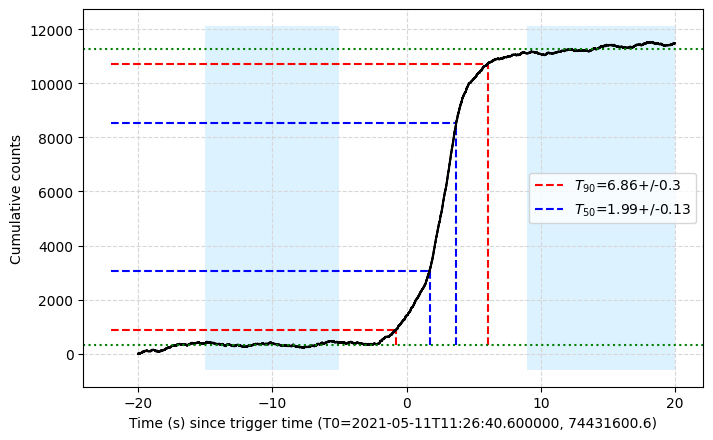

In [65]:
from gecam.time import GecamMet

cumsum_lc_fig3_2 = duration_obj3.plot_light_curve_cumsum(set_time_range=set_time_range,ref_time=trig_met)

# 光变的时间可能不是默认的GECAM的met时间，可重写xlabel
cumsum_lc_fig3_2.set_xlabel(f"Time (s) since trigger time (T0={GecamMet(trig_met).iso}, {trig_met})")
# 保存图像
# cumsum_lc_fig3_2.fig.savefig("test.png",bbox_inches="tight")